## Laboratory Experiment 006: First Order FeedForward Filter
# Jayvie Severo BSCpE - 3A
Let's analyze the impulse response of a 1st order feedforward filter.

In [1]:
pip install SciencePlots

Note: you may need to restart the kernel to use updated packages.


<function matplotlib.pyplot.show(close=None, block=None)>

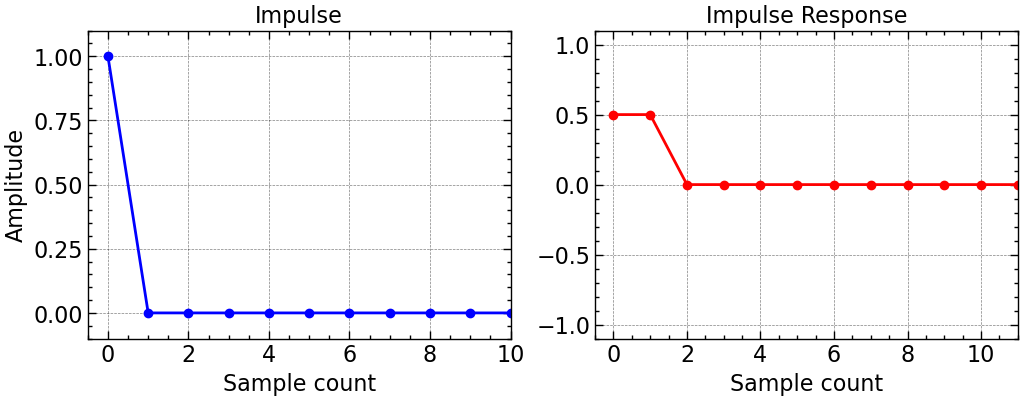

In [2]:
import scienceplots
import numpy as np
import matplotlib.pyplot as plt

# If the line below is giving you compiler errors, comment it out.
plt.style.use(['science', 'notebook', 'grid'])

frameSize = 2048

def feedForwardFilter(x, a0, a1):
    y = np.zeros(x.size)
    for n in range(0, x.size):
        y[n] = a0 * x[n] + a1 * x[n-1]
    return y


impulse = np.zeros(frameSize)
impulse[0] = 1;

impulseResponse = feedForwardFilter(impulse, 0.5, 0.5)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.plot(impulse, 'bo-')
ax.set_xlabel('Sample count')
ax.set_ylabel('Amplitude')
ax.set_ylim(-0.1, 1.1)
ax.set_xlim(-0.5, 10)
ax.set_title("Impulse")

ax = axes[1]
ax.plot(impulseResponse, 'ro-')
ax.set_xlabel('Sample count')
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-0.5, 11)
ax.set_title("Impulse Response")

plt.show

We can then perform a Fourier transform on the impulse signal. This will give us an array of complex numbers which is stored in `spectrum`. Extracting the magnitudes of the complex numbers and plotting them will give us a frequency response plot, and extracting the angles will give us a phase response plot

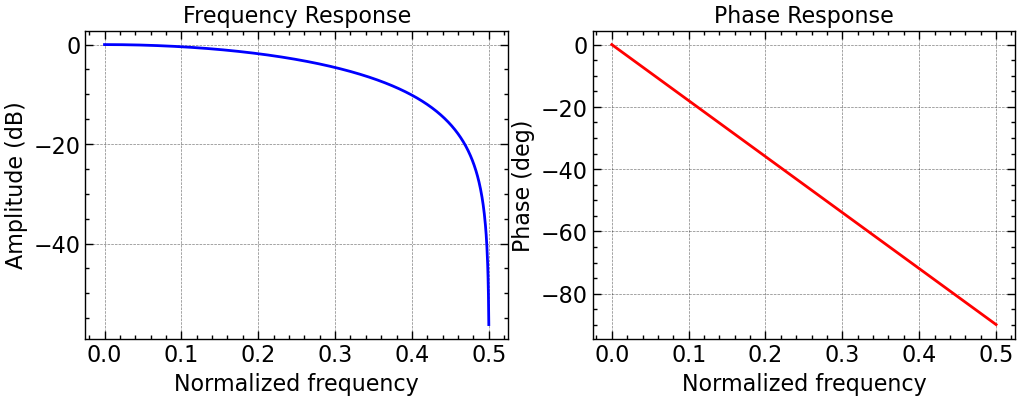

In [3]:
from scipy.fftpack import fft

spectrum = fft(feedForwardFilter(impulse, 0.5, 0.5))

x = np.linspace(0, 0.5, spectrum.size//2)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
with np.errstate(divide='ignore'):
    y = (20 * np.log10(np.abs(spectrum)))[:spectrum.size//2]
ax.plot(x, y, 'b')
ax.set_xlabel('Normalized frequency')
ax.set_ylabel('Amplitude (dB)')
ax.set_title("Frequency Response")

ax = axes[1]
y = np.degrees(np.angle(spectrum))[:spectrum.size//2]
ax.plot(x, y, 'r')
ax.set_xlabel('Normalized frequency')
ax.set_ylabel('Phase (deg)')
ax.set_title("Phase Response")

plt.show()